# **DATA CLEANING PROJECT**

## **SUMARRY**

### **<u>Objectives</u>**

- To make dirty data into cleaned data
- Remove all needless data
- To make complete data support for the analysis process 
- a complete goal table including 3 columns ( NAICS\_Industry\_Decription, LookupCodes, and Sectors)

### **<u>Dataset</u>**

- Using the **Table of size standards dataset** from [Table of size standards (sba.gov)](https://www.sba.gov/document/support-table-size-standards)
- The **table of size standards sheet** contains 2 columns ( NAICS\_Codes and NAICS\_Industry\_Decription)

### **<u>Tools</u>**

- SSIS Package (Visual Studio 2019) to import dataset ( CSV file) into database( MS SQL server)
- MS SQL server (Azure data studio) to write code chunks for cleaning data and write documentation

> **First glance at Table of size standards  Dataset**

In [ ]:
SELECT * 
FROM Sba_industry_standard

> **Select all data we need to use for creating a new table**

In [ ]:
SELECT 
    [NAICS _Codes], 
    [NAICS _Industry _Description]
FROM Sba_industry_standard 
WHERE [NAICS _Codes] =' ' --this is a filter to remove all outliers because every Row in the NAICS_Industry_Description column also has a blank in the NAICS_Codes column


> **Create a new LookupCodes column from the NAICS\_Industry\_Description column**

In [ ]:
SELECT 
    [NAICS _Industry _Description],
    SUBSTRING([NAICS _Industry _Description],8,2) 
    -- to extract code numbers from the NAICS_Industry_Description column
FROM Sba_industr_standard 
WHERE [NAICS _Codes] =' '

> **Create a new Sectors column from NAICS\_Industry\_Description column**

In [ ]:
SELECT 
    [NAICS _Industry _Description],
    SUBSTRING([NAICS _Industry _Description],8,2) AS LookupCocdes,
    SUBSTRING([NAICS _Industry _Description],CHARINDEX('–',[NAICS _Industry _Description]) +1,LEN(([NAICS _Industry _Description]))) AS Sectors 
    -- to extract string from the NAICS_Industry_Description column into a new Sectors Column
FROM Sba_industry_standard 
WHERE [NAICS _Codes] =' '

> **Remove Space before a new string in the Sectors column**

In [ ]:
SELECT 
    [NAICS _Industry _Description],
    SUBSTRING([NAICS _Industry _Description],8,2) AS LookupCocdes,
    ltrim(SUBSTRING([NAICS _Industry _Description],CHARINDEX('–',[NAICS _Industry _Description]) +1,LEN(([NAICS _Industry _Description])))) AS Sectors
    --use ltrim() function because space on the left side of the string
FROM Sba_industry_standard 
WHERE [NAICS _Codes] =' '

> **Remove all NA values and outliers values in the LookupCodes column AND create a new table (sba\_NAICS\_Codes\_Sectors)**

In [ ]:
SELECT*
INTO sba_NAICS_codes_sectors -- Create a new table(sba_NAICS_Codes_sectors) by using Subquery code chunk
FROM 
(

SELECT 
    [NAICS _Industry _Description],
    SUBSTRING([NAICS _Industry _Description],8,2) AS LookupCocdes,
    ltrim(SUBSTRING([NAICS _Industry _Description],CHARINDEX('–',[NAICS _Industry _Description]) +1,LEN(([NAICS _Industry _Description])))) AS Sectors
FROM Sba_industry_standard 
WHERE [NAICS _Codes] =' '

) AS temp_table
WHERE LookupCocdes != 'NA' AND LookupCocdes != 'bu' -- to remove NA values and outlier Values(bu) in LookupCodes column

> **First Glance at a new table (sba\_NAICS\_codes\_sectors) has been created**

In [ ]:
SELECT *
FROM sba_NAICS_codes_sectors


> **We realize some missing codes are 32, 43, and 49 in LookupCodes Column**
> 
> **Insert missing values into a new table (sba\_NAICS\_codes\_sectors)**

In [ ]:
INSERT INTO sba_NAICS_codes_sectors
VALUES  ('Sector 31 – 33 – Manufacturing',32,'Manufacturing'),
        ('Sector 44 - 45 – Retail Trade',43,'Retail Trade'),
        ('Sector 48 - 49 – Transportation and Warehousing',49,'Transportation and Warehousing')

> **We realize in a sectors column has an error string ( "33-Manufacturing")**  
> 
> **Fix  an error string ( "33-Manufacturing") by using UPDATE function**

In [ ]:
UPDATE sba_NAICS_codes_sectors
SET Sectors ='Manufacturing'
WHERE [NAICS _Industry _Description] = 'Sector 31 – 33 – Manufacturing'

> **Select all data from a complete table have just been created**

In [ ]:
SELECT *
FROM sba_NAICS_codes_sectors
ORDER BY LookupCocdes
-- This is a complete goal table that we need to create, it contains 3 columns (NAICS_Industry_Description, LookupCodes, Sectors)

> **The screenshot of the result table**

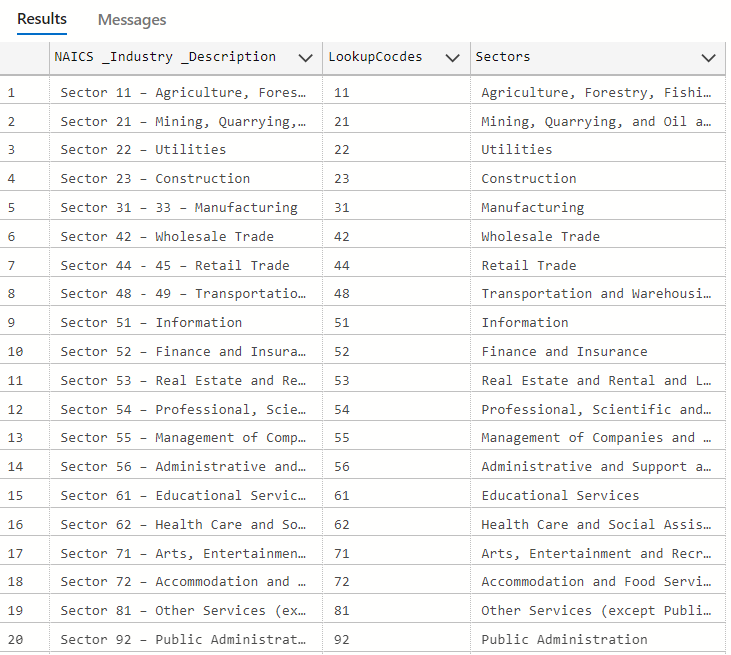